In [30]:
%matplotlib inline

from modsim import *

In [31]:
def make_system(beta, gamma, delta, epsilon):
    init = State(S=9999999, I=1, Z=0, R=0, D=0)
    init /= np.sum(init)

    t0 = 0
    t_end = 365 * 8


    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, delta=delta, epsilon=epsilon)

In [32]:
def plot_results(S, I, Z, R, D):
    plot(S, '--', color='green', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(Z, ':', color='purple', label='Zombie')
    plot(R, '-', color= 'blue', label='Recovered')
    plot(D, '--', color= 'black', label='Dead')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [33]:
def calc_total_infected(system):
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]

In [42]:
def calc_total_survivors(system):
    frame = system.results
    return frame.R[system.t_end] 

In [34]:
def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.loc[t0] = init
    
    for i in linrange(t0, t_end):
        frame.loc[i+1] = update_func(frame.loc[i], system)
    
    system.results = frame

In [35]:
def update1(state, system):
    
    unpack(system)
    
    s, i, z, r, d = state

    infected = beta * z * s    
    zombie = gamma * i 
    recovered = delta * i
    dead = epsilon * z * (r + s)
    
    s -= infected
    i += infected - zombie - recovered
    z += zombie - dead
    r += recovered
    d += dead
    
    return State(S=s, I=i, Z=z, R=r, D=d)

In [36]:
system = make_system(0.1, 0.06, 0.04, 0.01)
run_simulation(system, update1)
system.results.head()

,S,I,Z,R,D
0,1.0,1.000000e-07,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,9.000000e-08,6.000000e-09,4.000000e-09,0.000000e+00
2,1.0,8.160000e-08,1.134000e-08,7.600000e-09,5.999999e-11
3,1.0,7.457400e-08,1.612260e-08,1.086400e-08,1.734000e-10
4,1.0,6.872886e-08,2.043581e-08,1.384696e-08,3.346260e-10


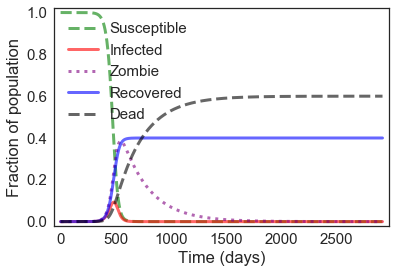

In [37]:
frame = system.results
plot_results(frame.S, frame.I, frame.Z, frame.R, frame.D)

In [38]:
beta_array = linspace(0.1, 0.9, 21)
gamma = .05
delta = 0.05
epsilon = .01

In [43]:
def sweep_beta(beta_array, gamma, delta, epsilon):

    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma, delta, epsilon)
        run_simulation(system, update1)
        sweep[system.beta] = calc_total_survivors(system)
    return sweep

infected_sweep = sweep_beta(beta_array, gamma, delta, epsilon)

Saving figure to file chap06-fig01.pdf


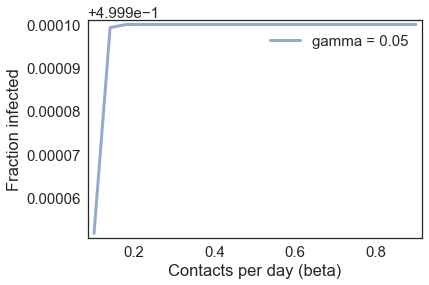

In [44]:
label = 'gamma = ' + str(gamma)
plot(infected_sweep, label=label)
decorate(xlabel='Contacts per day (beta)',
         ylabel='Fraction infected')

savefig('chap06-fig01.pdf')